In [31]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.spatial.distance import hamming


In [23]:
class Hopfield:
    def __init__(self, n):
        self.n = n
        self.states = np.random.choice([-1, 1], n)
        self.biases = np.random.uniform(-1, 1, n)
        self.weights = np.random.uniform(-1, 1, (n, n)) * np.tri(n, n, -1)
        self.weights = self.weights + self.weights.T
        
    def update(self):
        x = np.random.randint(0, self.n)
        deltaE = self.checkEnergyChange(x)
        # Ebefore = self.checkEnergy()
        # self.states[x] *= -1
        # Eafter = self.checkEnergy()
        # deltaEHard = Eafter - Ebefore
        
        # print(f"delta E: {deltaE}")
        # print(f"deltaEHard: {deltaEHard}")
        if deltaE < 0:
            self.states[x] *= -1
                
    # def checkSpecificEnergy(self, x):
    #     return -(1/2) * self.states[x] * self.weights[x] @ self.states + self.biases[x] * self.states[x]
            
    def checkEnergyChange(self, x):
        # Ebefore = self.biases[x] * self.states[x]
        # for i in range(len(self.states)):
        #     Ebefore += self.weights[i][x] * self.states[i] * self.states[x]
        # Eafter = self.biases[x] * self.states[x] * -1
        # for i in range(len(self.states)):
        #     Eafter += self.weights[i][x] * self.states[i] * self.states[x] * -1
        # return Eafter - Ebefore
        
        Ebefore = -(1/2) * self.states[x] * self.weights[x] @ self.states + self.biases[x] * self.states[x]
        Eafter = -(1/2) * -self.states[x] * self.weights[x] @ self.states + self.biases[x] * -self.states[x]
        
        # Ebefore = self.checkEnergy()
        # self.states[x] *= -1
        # Eafter = self.checkEnergy()
        # self.states[x] *= -1
        return Eafter - Ebefore
    
    def hasConverged(self):
        for i in range(len(self.states)):
            deltaE = self.checkEnergyChange(i)
            if deltaE < 0:
                return False
        return True
    
    def checkEnergy(self):
        # E = 0
        # for i in range(len(self.states)):
        #     for j in range(len(self.states)):
        #         E += self.weights[i][j] * self.states[i] * self.states[j]
        # E = E * 1/2
        # for i in range(len(self.states)):
        #     E += self.biases[i] * self.states[i]
        # return E
        return -(1/2) * self.states.T @ self.weights @ self.states + self.biases @ self.states 
    
    def printState(self):
        print(self.states)
    
    def setState(self, state):
        self.states = state
        
    def setStateFromString(self, string):
        for i in range(len(string)):
            if string[i] == '0':
                self.states[i] = -1
            else:
                self.states[i] = 1
                
    def setWeightsFromString(self, strings): # this needs to store -1 and 1, not 0 and 1
        # self.weights = np.zeros((self.n, self.n))
        # for i in range(len(strings)):
        #     v = np.array(list(strings[i]), dtype=int)
        #     self.weights = self.weights + np.outer(v, v.T)
        # self.weights = self.weights / len(strings)
        strings = [np.array(list(string), dtype=int) for string in strings]
        imgs = np.array([st.flatten() for st in strings])
        imgs = [x * 2 - 1 for x in imgs]
        self.weights = (1/len(strings)) * sum([np.outer(st, st) for st in imgs])
                
    def stateAsImage(self):
        return self.states.reshape(int(np.sqrt(self.n)), int(np.sqrt(self.n)))
    
    def runUntilConverge(self):
        while(not self.hasConverged()):
            self.update()
            print(self.checkEnergy())

In [376]:
h = Hopfield(100)
h.printState()
print(h.checkEnergy())
while(not h.hasConverged()):
    h.update()
    # h.printState()
    print(h.checkEnergy())

[-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1
  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1
 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1  1 -1
 -1  1  1  1]
-11.67117518353361
-11.67117518353361
-11.67117518353361
-11.67117518353361
-11.67117518353361
-11.67117518353361
-32.835403348597346
-44.64042302598514
-46.73254888655029
-46.73254888655029
-46.73254888655029
-48.66925794043175
-55.68330197151667
-55.68330197151667
-69.93571062390656
-69.93571062390656
-74.24210079388736
-74.24210079388736
-90.19941760323059
-95.21631940197861
-95.21631940197861
-95.21631940197861
-105.32503569027949
-105.32503569027949
-108.17924597801034
-108.17924597801034
-110.0080448667909
-110.0080448667909
-110.0080448667909
-110.0080448667909
-110.0080448667909
-110.95544403407652
-110.95544403407652
-110.95544403407652
-110.95544403407652
-113.7909877279835
-

In [5]:
n = 100
runs = []
for h in tqdm(range(10)):
    Es = []
    h = Hopfield(n)
    count = 0
    while(not h.hasConverged()):
        h.update()
        count = count + 1
        if (count == n):
            Es.append(h.checkEnergy())
            count = 0
    runs.append(Es)

100%|██████████| 10/10 [00:01<00:00,  7.24it/s]


11
4
5
6
10
8
13
8
11
14


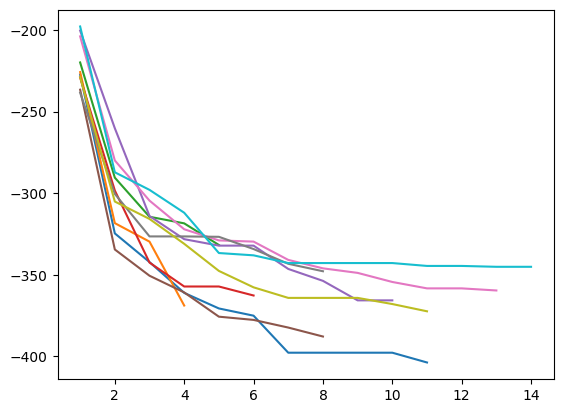

In [6]:
fig, ax = plt.subplots()

for i in range(len(runs)):
    print(len(runs[i]))
    ax.plot(np.linspace(1, len(runs[i]), len(runs[i])), runs[i])

In [7]:
# prove monotonically decreasing
for i in range(len(runs)):
    change =  np.array(runs[i][1:]) - np.array(runs[i][:-1])
    for j in change:
        if j > 0:
            print("problem:")
            print(j)

In [8]:
frown = "0000000000000100010000000000000000000000000010000000000000000001110000001000100001000001101000000001"
frownCorrupted = "0000000000000000000000000000000000000000000010000000000000000001110000001000100001000001101000000001"
tree = "0001111000000111100000001100000000110000001111111000001100100000110000000011000000001100000000110000"

In [28]:
def messUpString(uh, k):
    places = np.random.randint(0, len(uh), k)
    bs = np.array(list(uh), dtype=int)
    mask = np.zeros_like(bs)
    mask[places] = 1
    temp = bs + mask
    temp = [a % 2 for a in temp]
    out = ""
    for i in temp:
        out = out + str(i)
    return out
muckedUpFrown = messUpString(frown, 10)
muckedUpTree = messUpString(tree, 10)

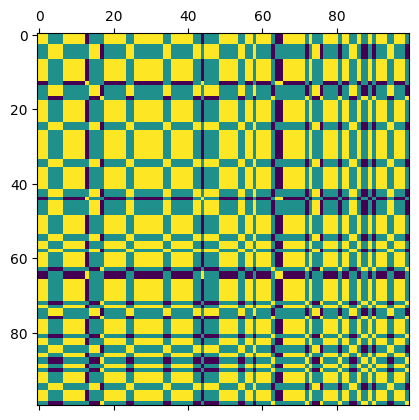

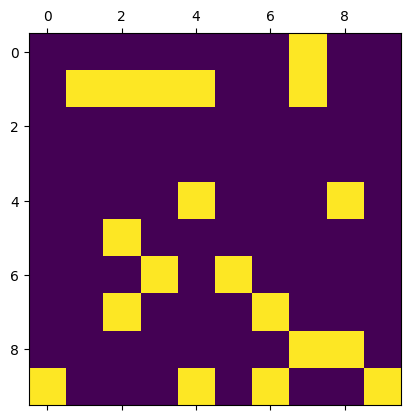

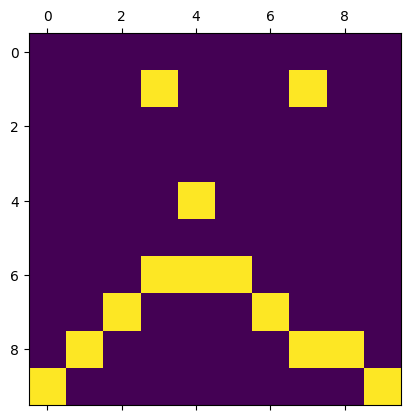

In [30]:
h = Hopfield(100)
h.setWeightsFromString([tree, frown])
h.setStateFromString(muckedUpFrown)
plt.matshow(h.weights)
plt.matshow(h.stateAsImage())
h.biases = np.ones(100)
while(not h.hasConverged()):
    h.update()
    # print(h.checkEnergy())
# for i in range(len(h.weights)):
#     print(h.weights[i])
plt.matshow(h.stateAsImage())

In [178]:
a = np.array(list("0100011"), dtype=int)
print(np.outer(a, a.T))

[[0 0 0 0 0 0 0]
 [0 1 0 0 0 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 1 1]
 [0 1 0 0 0 1 1]]


In [193]:
c =np.ones(9)
c.reshape(3, 3)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])